In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import RandomOverSampler, ADASYN, SMOTE
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
df = pd.read_csv('../Data/Fertilizer Prediction.csv')

In [3]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [4]:
df.tail()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP
98,29,58,57,Black,Sugarcane,12,0,10,20-20


In [5]:
df.shape

(99, 9)

This dataset cotain 99 rows and 9 columns

In [6]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [7]:
df.duplicated().sum()

0

There are no duplicate values in that dataset.

In [8]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

There are no missing values in that dataset.

In [9]:
all_col = list(df.columns)
num_col = list(df._get_numeric_data())
cat_col = list(set(all_col) - set(num_col))

print(f"All features : {all_col}")
print(f"\nNumerical features {num_col}")
print(f"\nCategorical features : {cat_col}")

All features : ['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name']

Numerical features ['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']

Categorical features : ['Soil Type', 'Fertilizer Name', 'Crop Type']


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temparature,99.0,30.282828,3.502304,25.0,28.0,30.0,33.0,38.0
Humidity,99.0,59.151515,5.840331,50.0,54.0,60.0,64.0,72.0
Moisture,99.0,43.181818,11.271568,25.0,34.0,41.0,50.5,65.0
Nitrogen,99.0,18.909091,11.599693,4.0,10.0,13.0,24.0,42.0
Potassium,99.0,3.383838,5.814667,0.0,0.0,0.0,7.5,19.0
Phosphorous,99.0,18.606061,13.476978,0.0,9.0,19.0,30.0,42.0


In [12]:
df.nunique()

Temparature        14
Humidity           13
Moisture           41
Soil Type           5
Crop Type          11
Nitrogen           24
Potassium          13
Phosphorous        32
Fertilizer Name     7
dtype: int64

In [13]:
for i in all_col:
    print(np.sort(df[i].unique()))
    print('\n')

[25 26 27 28 29 30 31 32 33 34 35 36 37 38]


[50 52 53 54 58 60 62 64 65 67 68 70 72]


[25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65]


['Black' 'Clayey' 'Loamy' 'Red' 'Sandy']


['Barley' 'Cotton' 'Ground Nuts' 'Maize' 'Millets' 'Oil seeds' 'Paddy'
 'Pulses' 'Sugarcane' 'Tobacco' 'Wheat']


[ 4  5  6  7  8  9 10 11 12 13 14 15 21 22 23 24 35 36 37 38 39 40 41 42]


[ 0  7  8  9 10 12 13 14 15 16 17 18 19]


[ 0  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 28 29 30 31 32 33
 35 36 37 38 39 40 41 42]


['10-26-26' '14-35-14' '17-17-17' '20-20' '28-28' 'DAP' 'Urea']




In [14]:
for i in cat_col:
    print(f"{i} Columns ")
    print(df[i].value_counts())
    print('\n')

Soil Type Columns 
Loamy     21
Sandy     20
Clayey    20
Black     19
Red       19
Name: Soil Type, dtype: int64


Fertilizer Name Columns 
Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: Fertilizer Name, dtype: int64


Crop Type Columns 
Sugarcane      13
Cotton         12
Millets        11
Paddy          10
Pulses         10
Wheat           9
Tobacco         7
Barley          7
Oil seeds       7
Ground Nuts     7
Maize           6
Name: Crop Type, dtype: int64




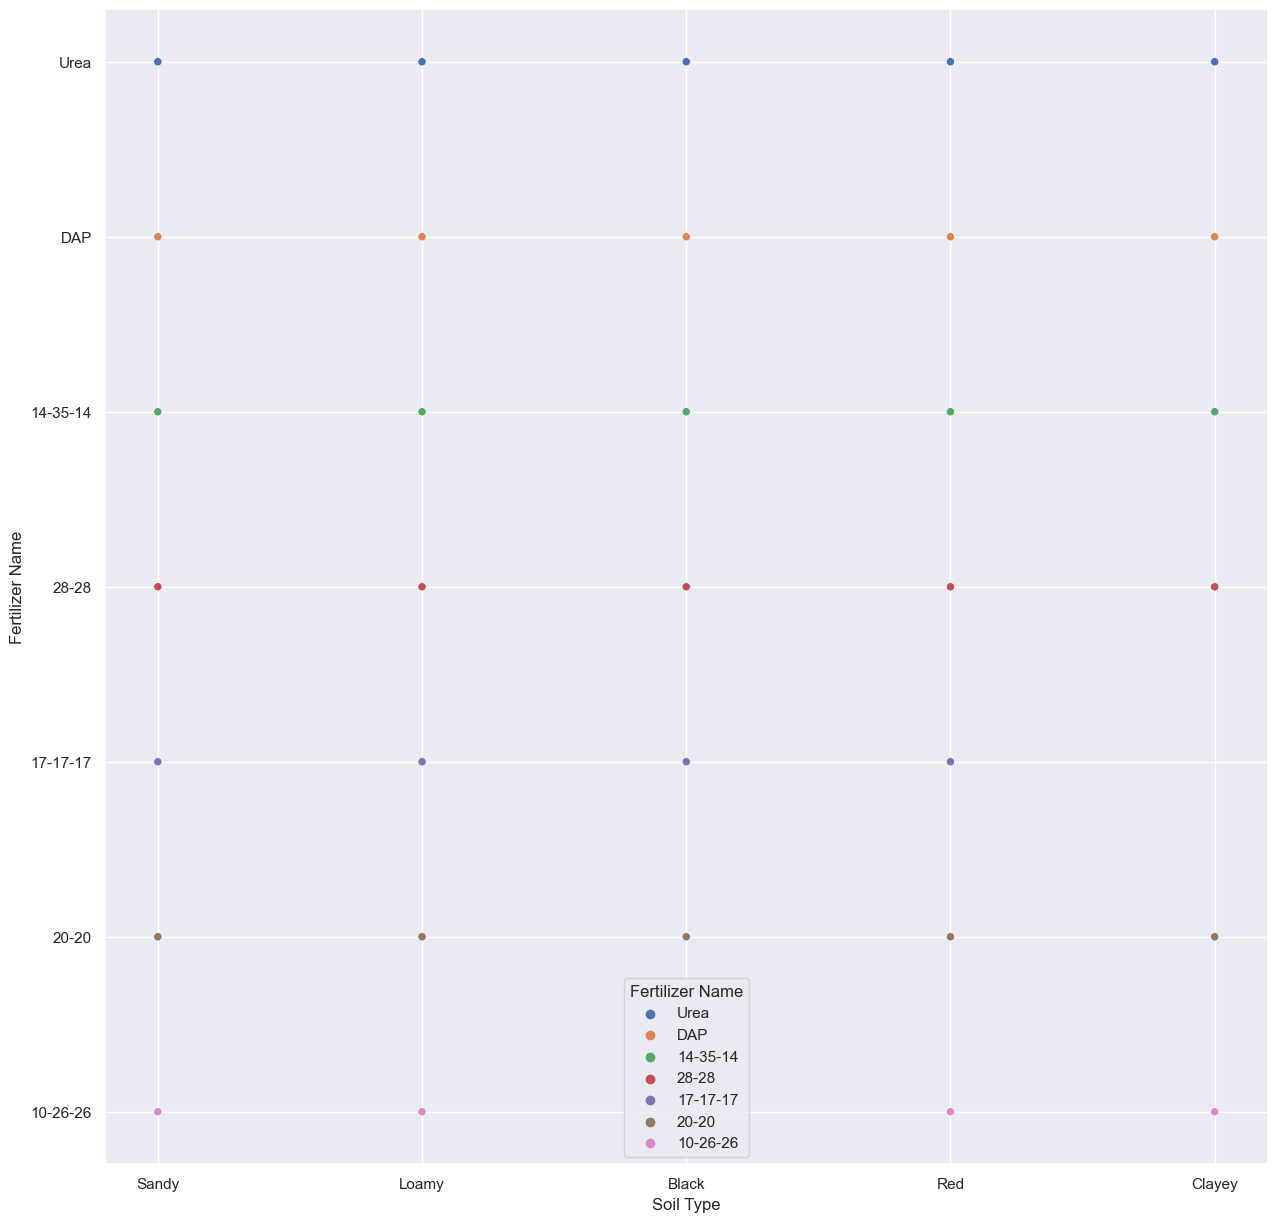

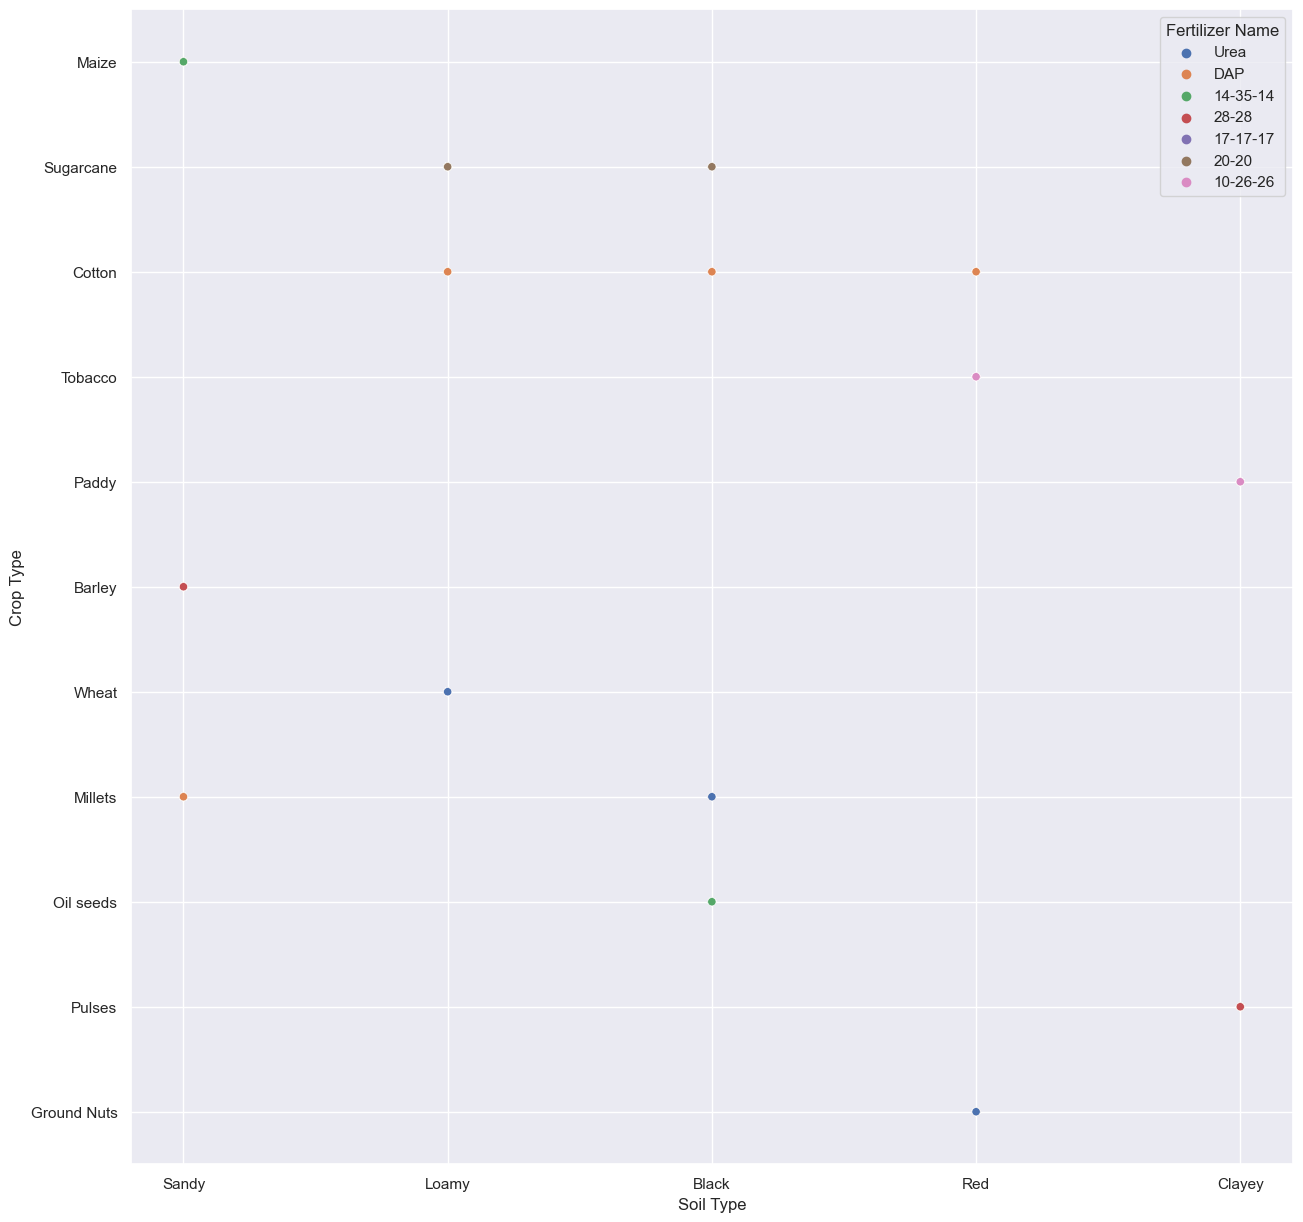

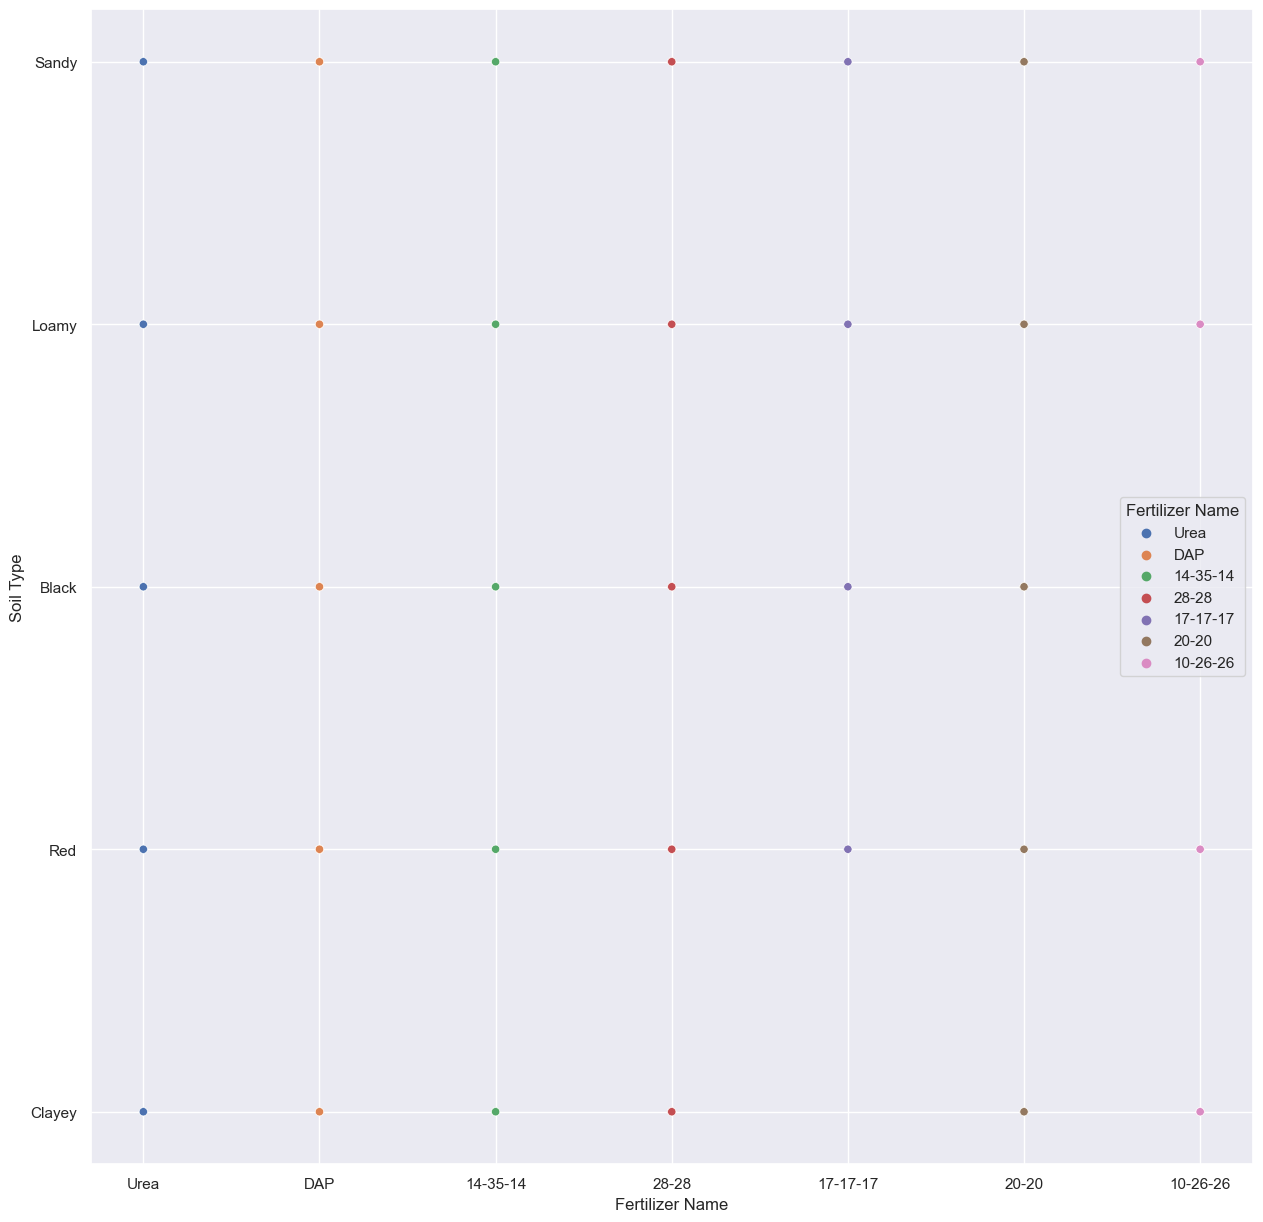

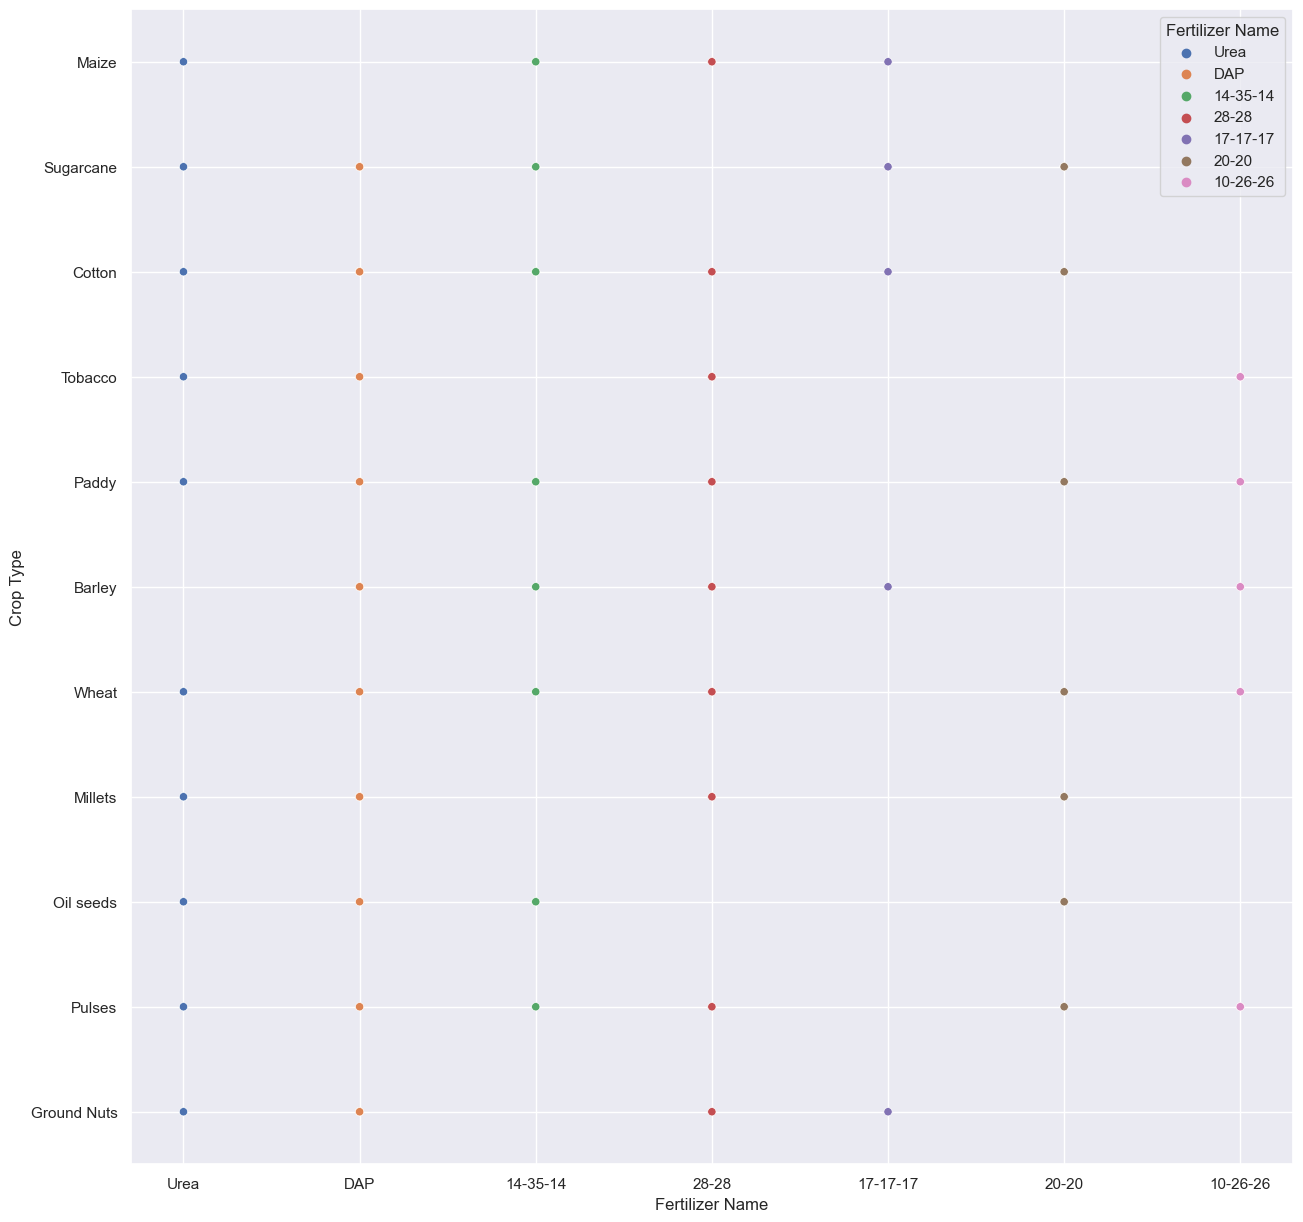

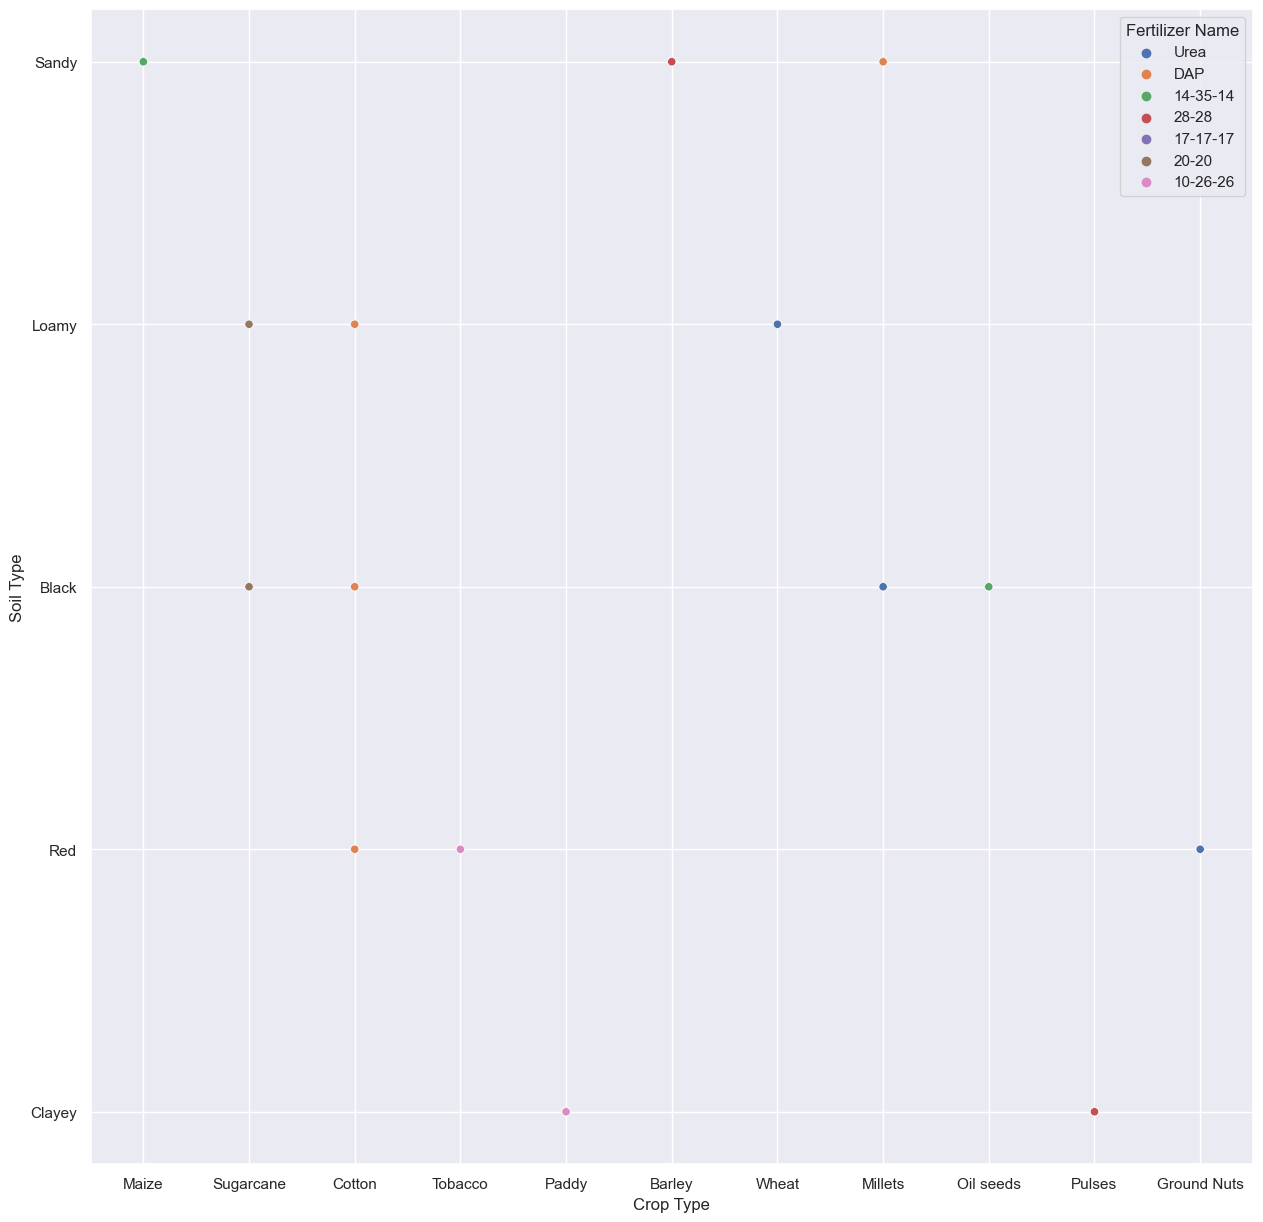

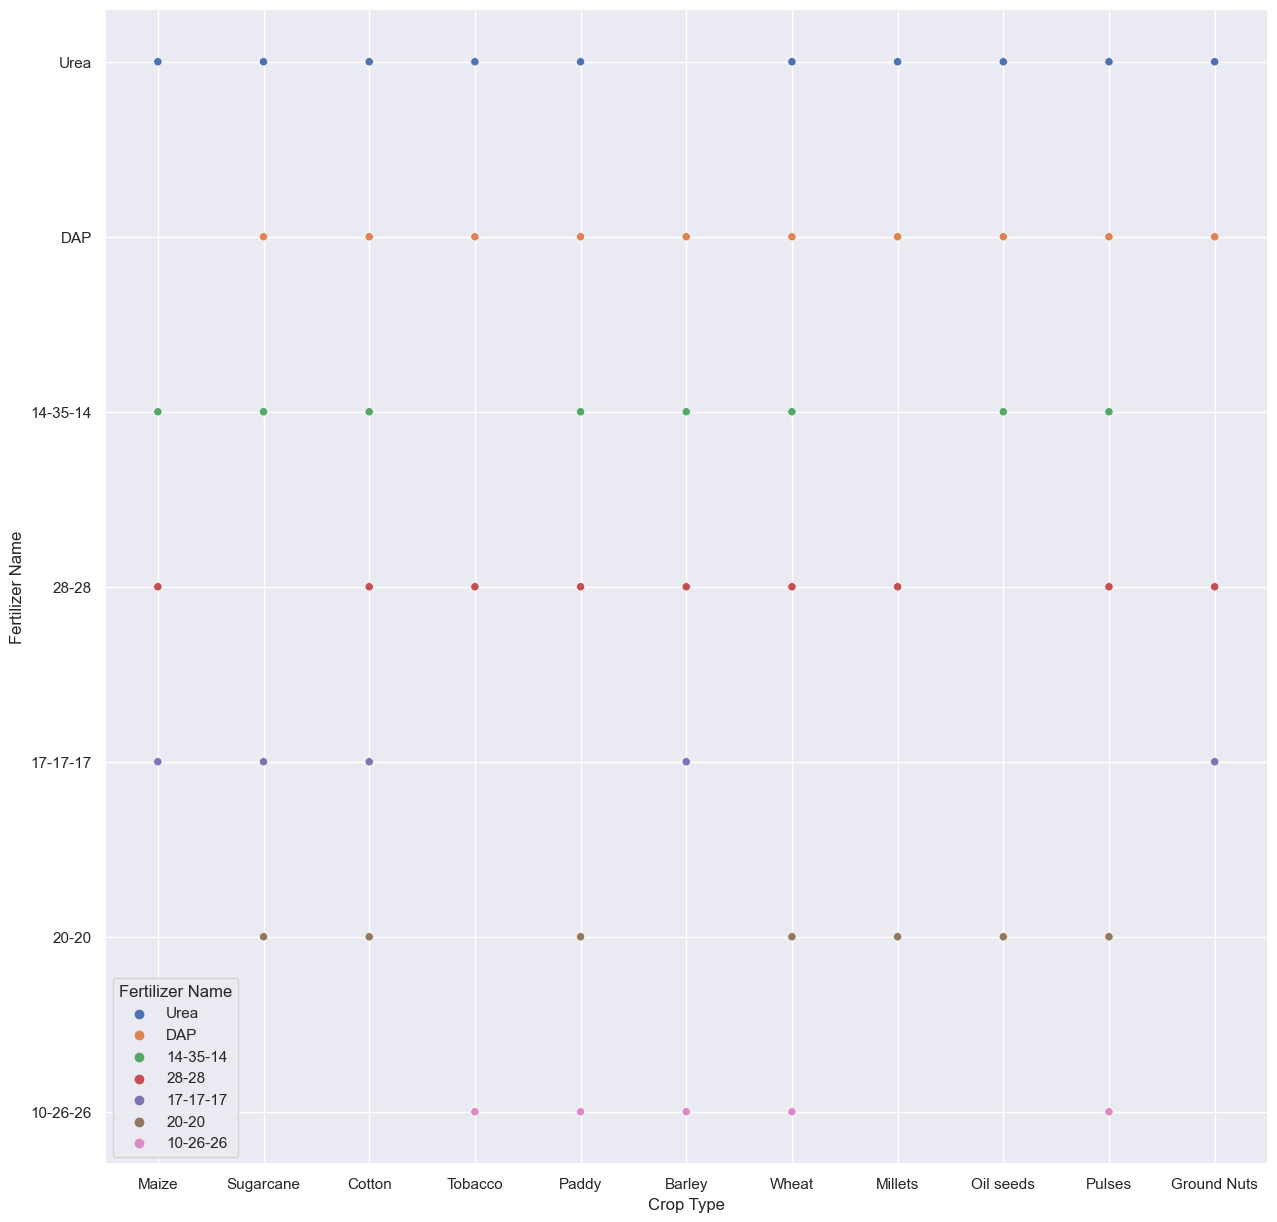

In [17]:
for i in cat_col:
    for j in cat_col:
        if (i == j):
            continue
        
        sns.set()
        plt.figure(figsize = (15, 15))
        sns.scatterplot(data = df, x = i, y = j, hue = 'Fertilizer Name')
        plt.show()

# Splt data

In [19]:
x = df.drop(columns = ['Fertilizer Name'], axis = 1)
y = df[['Fertilizer Name']]

In [21]:
print(f"x has : {x.shape}")
x.head()

x has : (99, 8)


,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,26,52,38,Sandy,Maize,37,0,0
1,29,52,45,Loamy,Sugarcane,12,0,36
2,34,65,62,Black,Cotton,7,9,30
3,32,62,34,Red,Tobacco,22,0,20
4,28,54,46,Clayey,Paddy,35,0,0


In [22]:
print(f"y has : {y.shape}")
y.head()

y has : (99, 1)


,Fertilizer Name
0,Urea
1,DAP
2,14-35-14
3,28-28
4,Urea


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.9, random_state = 56, shuffle = True)

In [25]:
print(f"x_train has : {x_train.shape}")
print(f"y_train has : {y_train.shape}")
print(f"x_test has : {x_test.shape}")
print(f"y_test has : {y_test.shape}")

x_train has : (89, 8)
y_train has : (89, 1)
x_test has : (10, 8)
y_test has : (10, 1)


In [26]:
x_all_col = list(x.columns)
x_num_col = list(x._get_numeric_data())
x_cat_col = list(set(x_all_col) - set(x_num_col))

# Preprocessor pipeline

In [27]:
num_pipe = Pipeline(steps = [
    ("KNNImputer" , KNNImputer(n_neighbors = 4)),
    ("VarianceThreshold", VarianceThreshold(threshold = 0.0)),
    ("StandardScaler", StandardScaler())
])

num_pipe

Pipeline(steps=[('KNNImputer', KNNImputer(n_neighbors=4)),
                ('VarianceThreshold', VarianceThreshold()),
                ('StandardScaler', StandardScaler())])